##### Author: Raffi Sahakyan

##### Project Name: Determination of Value at Risk for a portfolio of 3 Stocks

In [152]:
# importing libraries
import numpy as np
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we will use magic to avoid calling plt.show() everytime
%matplotlib inline

In [153]:
# We will make invesments in Disney, Nike and McDonalds
# We get stock prices from quandl
disney=quandl.get("EOD/DIS", authtoken="API")
nike=quandl.get("EOD/NKE", authtoken="API")
mcd=quandl.get("EOD/MCD", authtoken="API")

In [154]:
# Looking at several rows of each dataframe
print("Disney")
print("-------------------------------------------------------------------------")
print(disney.head())
print("-------------------------------------------------------------------------")
print("Nike")
print("-------------------------------------------------------------------------")
print(nike.head())
print("-------------------------------------------------------------------------")
print("McDonalds")
print("-------------------------------------------------------------------------")
print(mcd.head())

Disney
-------------------------------------------------------------------------
             Open   High    Low  Close  Volume  Dividend  Split  Adj_Open  \
Date                                                                        
1962-01-02  37.25  38.50  37.25  37.25  2098.0       0.0    1.0  0.056800   
1962-01-03  37.25  37.88  37.25  37.75  1998.0       0.0    1.0  0.056047   
1962-01-04  37.75  37.88  37.50  37.75  2397.0       0.0    1.0  0.056800   
1962-01-05  37.75  38.00  37.63  37.88  2397.0       0.0    1.0  0.056605   
1962-01-08  37.88  38.38  37.00  37.75  3197.0       0.0    1.0  0.056995   

            Adj_High   Adj_Low  Adj_Close  Adj_Volume  
Date                                                   
1962-01-02  0.058706  0.056800     0.0568   408858.24  
1962-01-03  0.056995  0.056047     0.0568   389370.24  
1962-01-04  0.056995  0.056424     0.0568   467127.36  
1962-01-05  0.056980  0.056425     0.0568   467127.36  
1962-01-08  0.057748  0.055671     0.0568  

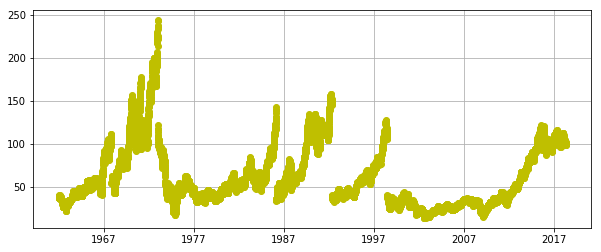

In [155]:
# plotting the trend of opening price during the time (Disney)
plt.figure(figsize=(10,4))
plt.grid(True) #introducing grid at the background
plt.plot(disney['Open'],"yo") # making the trendline yellow

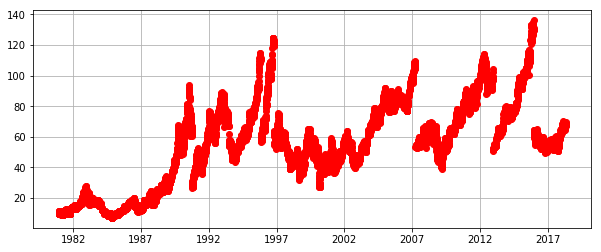

In [156]:
# plotting the trend of opening price during the time (Nike)
plt.figure(figsize=(10,4))
plt.grid(True) #introducing grid at the background
plt.plot(nike['Open'],"ro") # making the trendline yellow

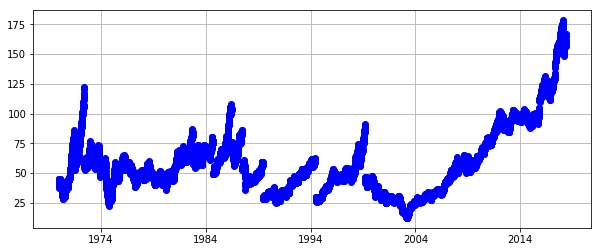

In [157]:
# plotting the trend of opening price during time (McDonalds)
plt.figure(figsize=(10,4))
plt.grid(True) #introducing grid at the background
plt.plot(mcd['Open'],"bo") # making the trendline yellow

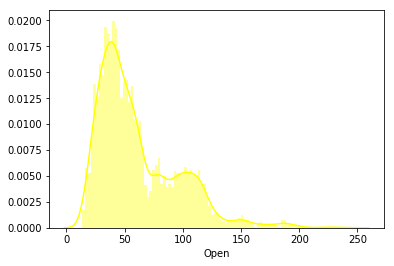

In [158]:
# what's more interesting to see is the distribution of opening prices
sns.distplot(disney['Open'],bins=100,color="yellow")

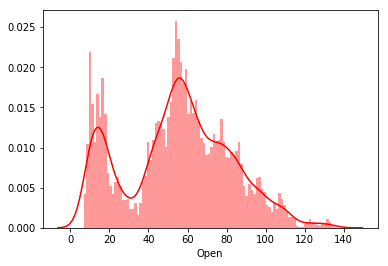

In [159]:
sns.distplot(nike['Open'],bins=100,color="red")

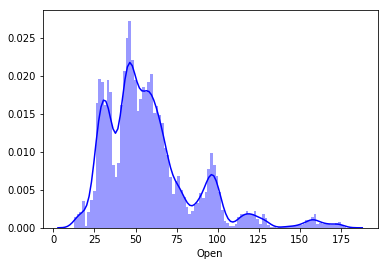

In [160]:
sns.distplot(mcd['Open'],bins=100,color="blue")

Now we look at the distribution of changes of the opening prices. We use pct_change() function. For the first row we don't have percentage change and this value will become N/A. Therefore, we need to remove this value using dropna() function. 

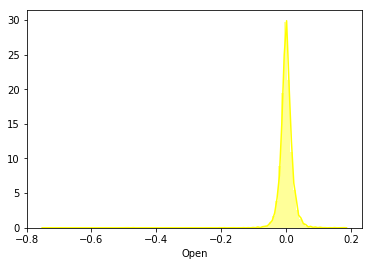

In [161]:
sns.distplot(disney['Open'].pct_change().dropna(),bins=100,color="yellow")

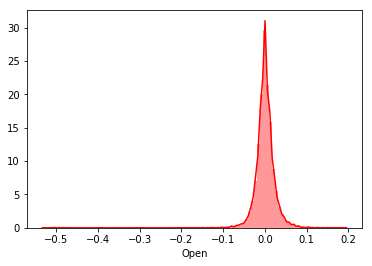

In [162]:
sns.distplot(nike['Open'].pct_change().dropna(),bins=100,color="red")

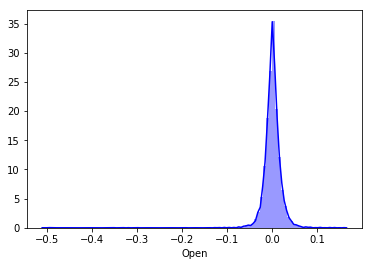

In [163]:
sns.distplot(mcd['Open'].pct_change().dropna(),bins=100,color="blue")

From the distribution plots above we see that openning prices of the stocks are normally distributed with mean close to 0.  

Let's now define a stock_simulator() function, that will get some arguments, and based on that simulate future price. The arguments are:

#### starting_price 
the price that Monte Carlo simulation will start from.

#### periods
number of periods you want to make simulation on. We will use days, and make a simulation for 365 years.

#### mean 
the average change in price

#### std 
the standard deviation of the change in price.

In [164]:
# simulation function
def stock_simulator(starting_price,periods,mean,std):
    X_axis = []
    Y_axis = []
    
    current_period = 1
    previous_price = starting_price
    
    while current_period <= periods:
        
        drift = float(mean)/periods
        shock = np.random.normal(loc=drift,scale=float(std)/np.sqrt(periods))
        
        current_price = previous_price + previous_price*(drift + shock)
        previous_price = current_price
        
        X_axis.append(current_period)
        Y_axis.append(current_price)
        
        current_period = current_period + 1
    
    plt.subplot(121)
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

In [165]:
# simulation inputs for Disney
starting_price_d = disney["Open"][-1]
periods_d = 365
mean_d = disney["Open"].pct_change().dropna().mean()
std_d = disney["Open"].pct_change().dropna().std()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


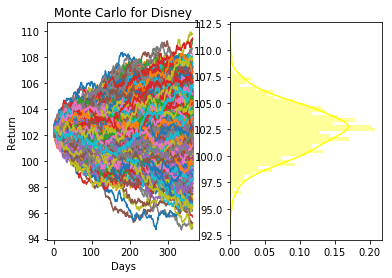

In [166]:
# simulation for Disney (1,000 different scenarios)
simulations_d=0
outcomes_d = []
while simulations_d < 1000:
    outcomes_d.append(stock_simulator(starting_price_d,periods_d,mean_d,std_d))
    simulations_d += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for Disney")
plt.subplot(122)
sns.distplot(outcomes_d,bins=50,color="yellow",vertical=True)

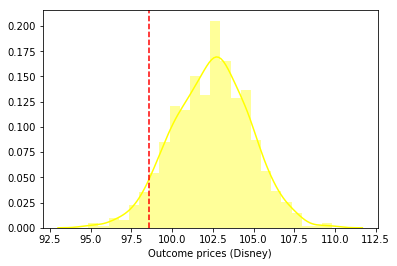

In [167]:
# We rotate the second graph and plot the first 5 percentiles
q_d = np.percentile(outcomes_d,5)
sns.distplot(outcomes_d,color="yellow",vertical=False,axlabel='Outcome prices (Disney)')
plt.axvline(q_d, color="red", linestyle="--") # plot vertical line on that percentile

In [168]:
# simulation inputs for Nike
starting_price_n = nike["Open"][-1]
periods_n = 365
mean_n = nike["Open"].pct_change().dropna().mean()
std_n = nike["Open"].pct_change().dropna().std()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


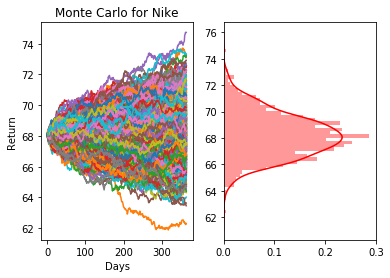

In [169]:
# simulation for Nike (1,000 different scenarios)
simulations_n=0
outcomes_n = []
while simulations_n < 1000:
    outcomes_n.append(stock_simulator(starting_price_n,periods_n,mean_n,std_n))
    simulations_n += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for Nike")
plt.subplot(122)
sns.distplot(outcomes_n,bins=50,color="red",vertical=True)

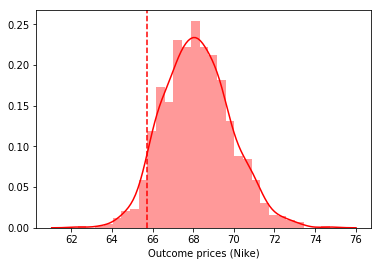

In [170]:
# We rotate the second graph and plot the first 5 percentiles
q_n = np.percentile(outcomes_n,5)
sns.distplot(outcomes_n,color="red",vertical=False,axlabel='Outcome prices (Nike)')
plt.axvline(q_n, color="red", linestyle="--") # plot vertical line on that percentile

In [171]:
# simulation inputs for McDonalds
starting_price_m = mcd["Open"][-1]
periods_m = 365
mean_m = mcd["Open"].pct_change().dropna().mean()
std_m = mcd["Open"].pct_change().dropna().std()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


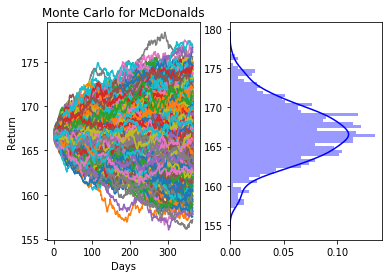

In [172]:
# simulation for McDonalds (1,000 different scenarios)
simulations_m=0
outcomes_m = []
while simulations_m < 1000:
    outcomes_m.append(stock_simulator(starting_price_m,periods_m,mean_m,std_m))
    simulations_m += 1
    
plt.ylabel('Return')
plt.xlabel('Days')
plt.title("Monte Carlo for McDonalds")
plt.subplot(122)
sns.distplot(outcomes_m,bins=50,color="blue",vertical=True)

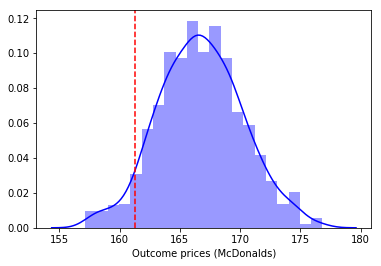

In [173]:
# We rotate the second graph and plot the first 5 percentiles
q_m = np.percentile(outcomes_m,5)
sns.distplot(outcomes_m, color="blue",vertical=False,axlabel='Outcome prices (McDonalds)')
plt.axvline(q_m, color="red", linestyle="--") # plot vertical line on that percentile

In [178]:
VaR_coef_d = (starting_price_d - q_d)/starting_price_d
# We decide on how much you want to invest in each stock, given that the total investment amount is $10,000
investment = 10000
investment_d = 5000
investment_n = 2000
investment_m = 3000
VaR_d = VaR_coef_d*investment_d
print(VaR_d)

184.27256153005064


In [179]:
VaR_coef_n = (starting_price_n - q_n)/starting_price_n

VaR_n = VaR_coef_n*investment_n
print(VaR_n)

68.78191256362693


In [180]:
VaR_coef_m = (starting_price_m - q_m)/starting_price_m

VaR_m = VaR_coef_m*investment_m
print(VaR_m)

98.70358376807779


In [181]:
#VaR for the portfolio
VaR_total = VaR_d+VaR_n+VaR_m
print("Total VaR for the portfolio is $", VaR_total)

Total VaR for the portfolio is $ 351.7580578617554
